#  Principal Component Assessment
Finding the optimum number of principal components for each model.

Comparisons between scaled and unscaled data provided the confirmation that unscaled data should be used moving forward.

In [ ]:
#import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy import asarray, save, load
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score, recall_score, roc_auc_score, precision_score

In [2]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(loaded_data)

## Decision Trees PCs 
Results
>1 0.777 (0.201)
>2 0.963 (0.083)
>3 0.947 (0.117)
>4 0.940 (0.119)
>5 0.932 (0.139)
>6 0.917 (0.152)
>7 0.940 (0.130)
>8 0.942 (0.098)
>9 0.917 (0.152)
>10 0.917 (0.152)
>11 0.917 (0.152)
>12 0.933 (0.132)
>13 0.910 (0.161)
>14 0.933 (0.132)
>15 0.927 (0.143)
>16 0.917 (0.152)
>17 0.917 (0.152)
>18 0.933 (0.132)
>19 0.917 (0.152)
>20 0.917 (0.152)

>1 0.777 (0.201)
>2 0.972 (0.073)
>3 0.963 (0.083)
>4 0.955 (0.111)
>5 0.933 (0.132)
>6 0.933 (0.132)
>7 0.917 (0.152)
>8 0.933 (0.132)
>9 0.940 (0.130)
>10 0.917 (0.152)
>11 0.917 (0.152)
>12 0.910 (0.161)
>13 0.933 (0.132)
>14 0.917 (0.152)
>15 0.910 (0.161)
>16 0.933 (0.132)
>17 0.933 (0.132)
>18 0.933 (0.132)
>19 0.910 (0.161)
>20 0.917 (0.152)


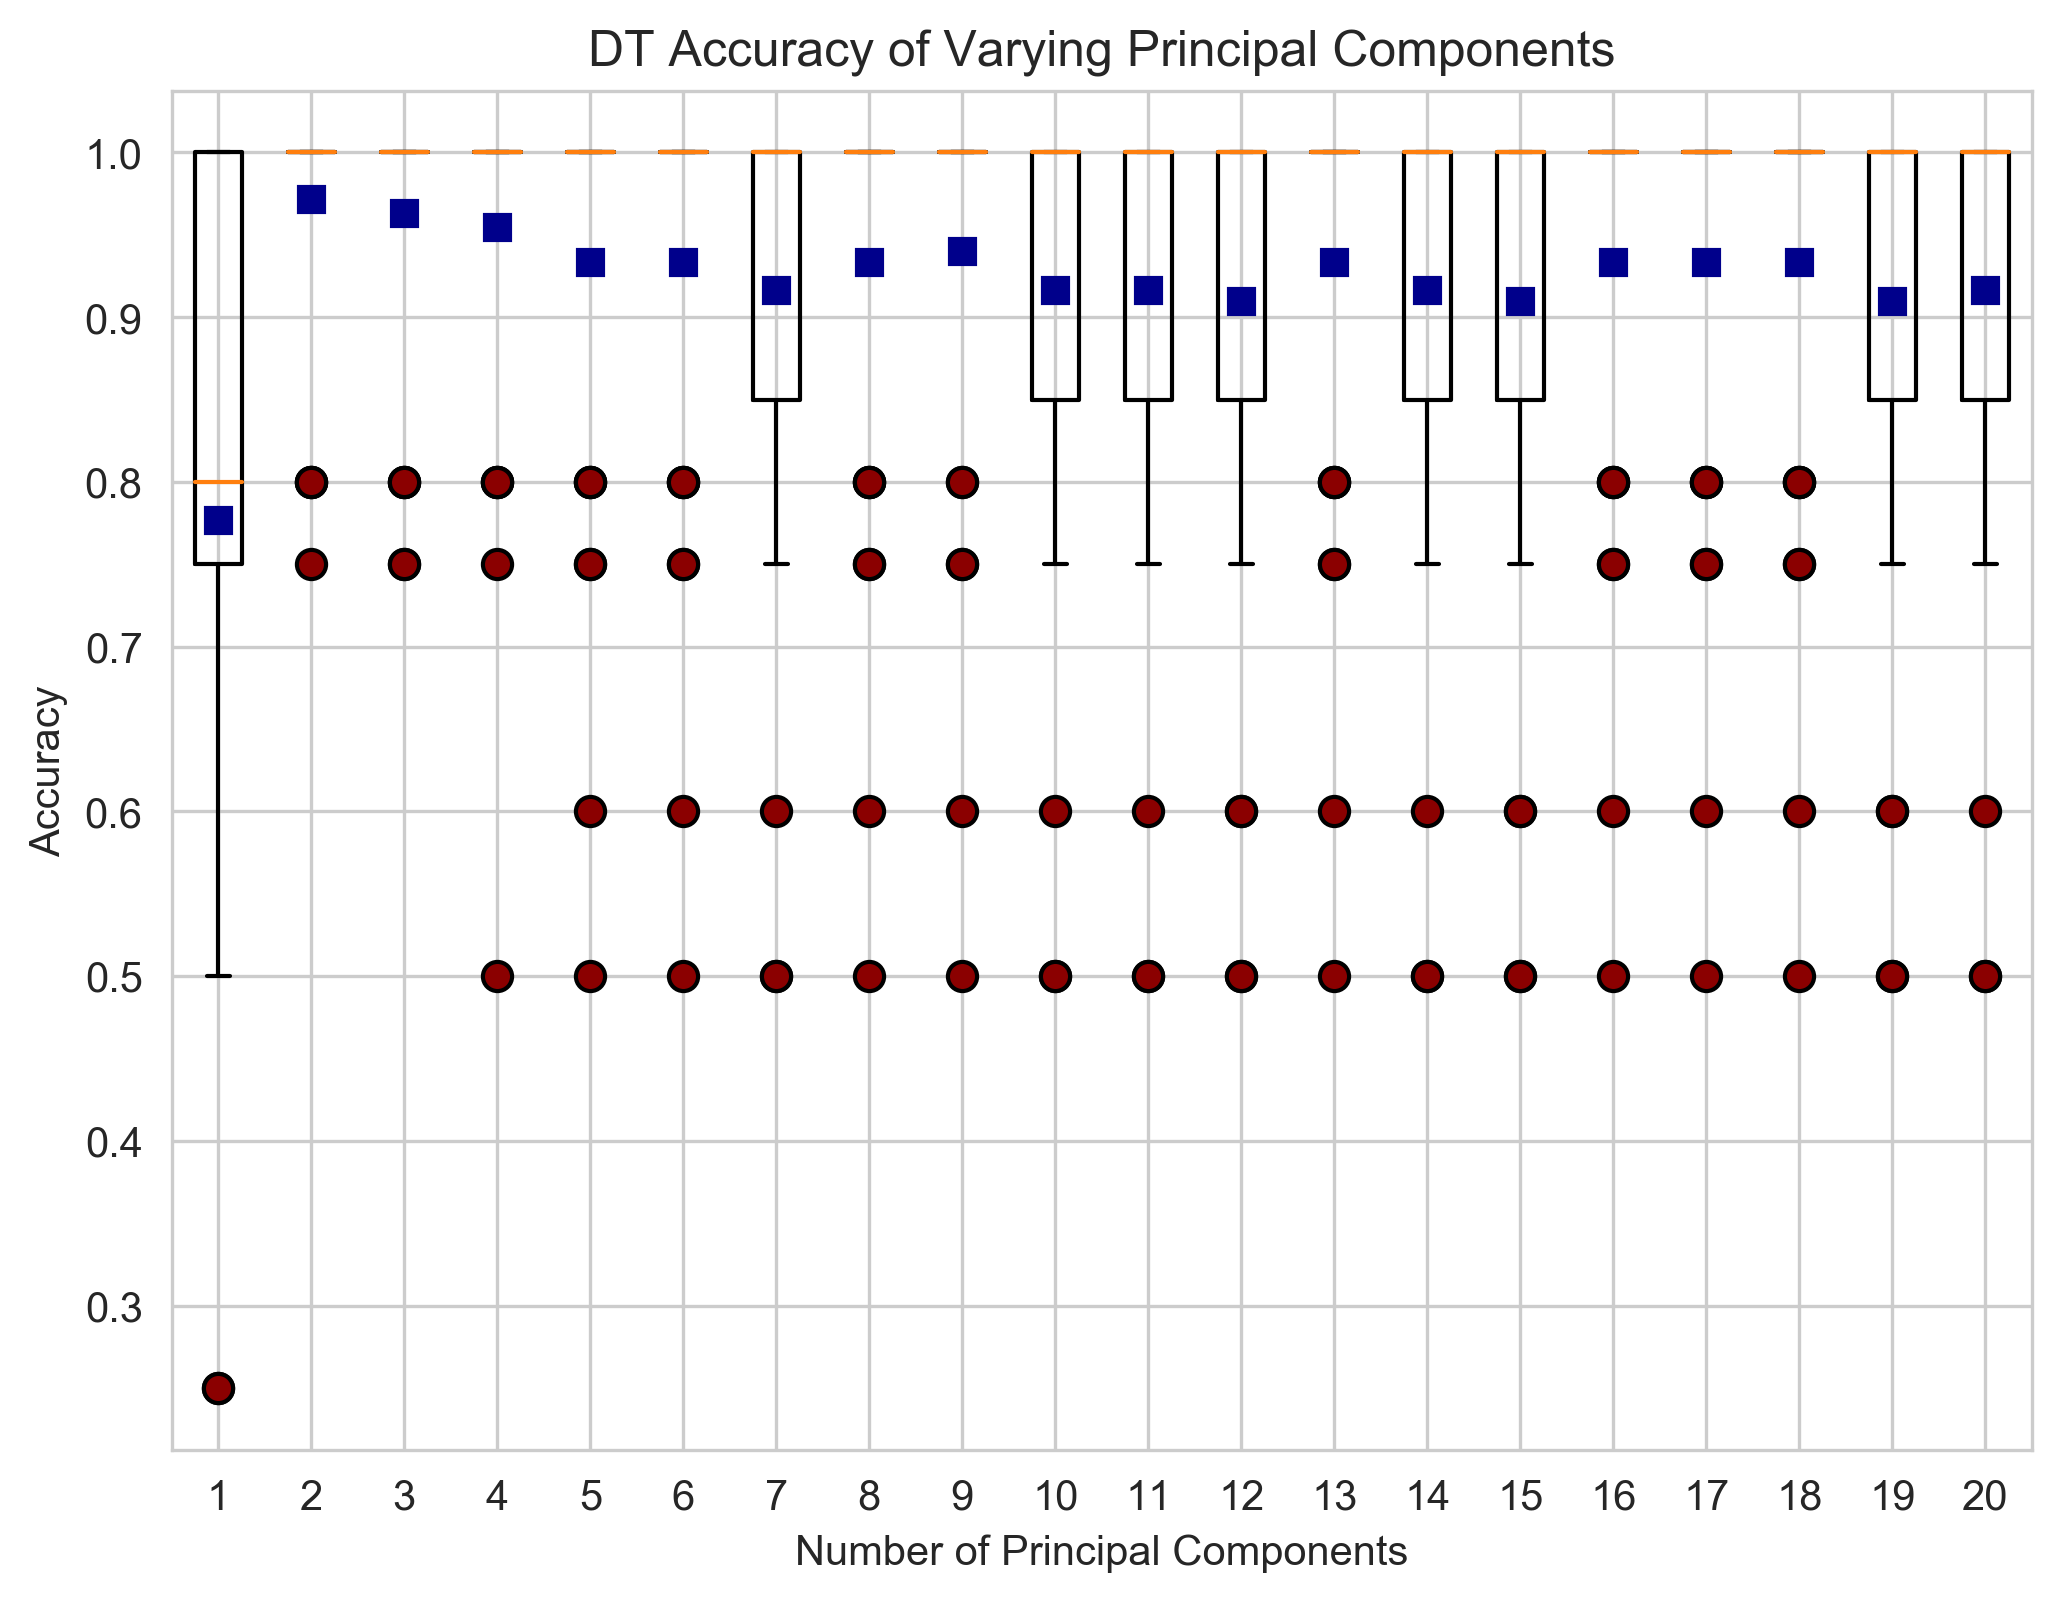

In [8]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', DecisionTreeClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('DT Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

## k-Nearest Neighbors PCs 
Results
>1 0.818 (0.170)
>2 0.970 (0.077)
>3 0.955 (0.091)
>4 0.955 (0.091)
>5 0.955 (0.091)
>6 0.955 (0.091)
>7 0.955 (0.091)
>8 0.948 (0.094)
>9 0.955 (0.091)
>10 0.955 (0.091)
>11 0.955 (0.091)
>12 0.948 (0.108)
>13 0.948 (0.108)
>14 0.948 (0.108)
>15 0.933 (0.115)
>16 0.933 (0.115)
>17 0.933 (0.115)
>18 0.933 (0.115)
>19 0.933 (0.115)
>20 0.933 (0.115)

>1 0.818 (0.170)
>2 0.970 (0.077)
>3 0.955 (0.091)
>4 0.955 (0.091)
>5 0.955 (0.091)
>6 0.955 (0.091)
>7 0.955 (0.091)
>8 0.948 (0.094)
>9 0.955 (0.091)
>10 0.955 (0.091)
>11 0.955 (0.091)
>12 0.948 (0.108)
>13 0.948 (0.108)
>14 0.948 (0.108)
>15 0.933 (0.115)
>16 0.933 (0.115)
>17 0.933 (0.115)
>18 0.933 (0.115)
>19 0.933 (0.115)
>20 0.933 (0.115)


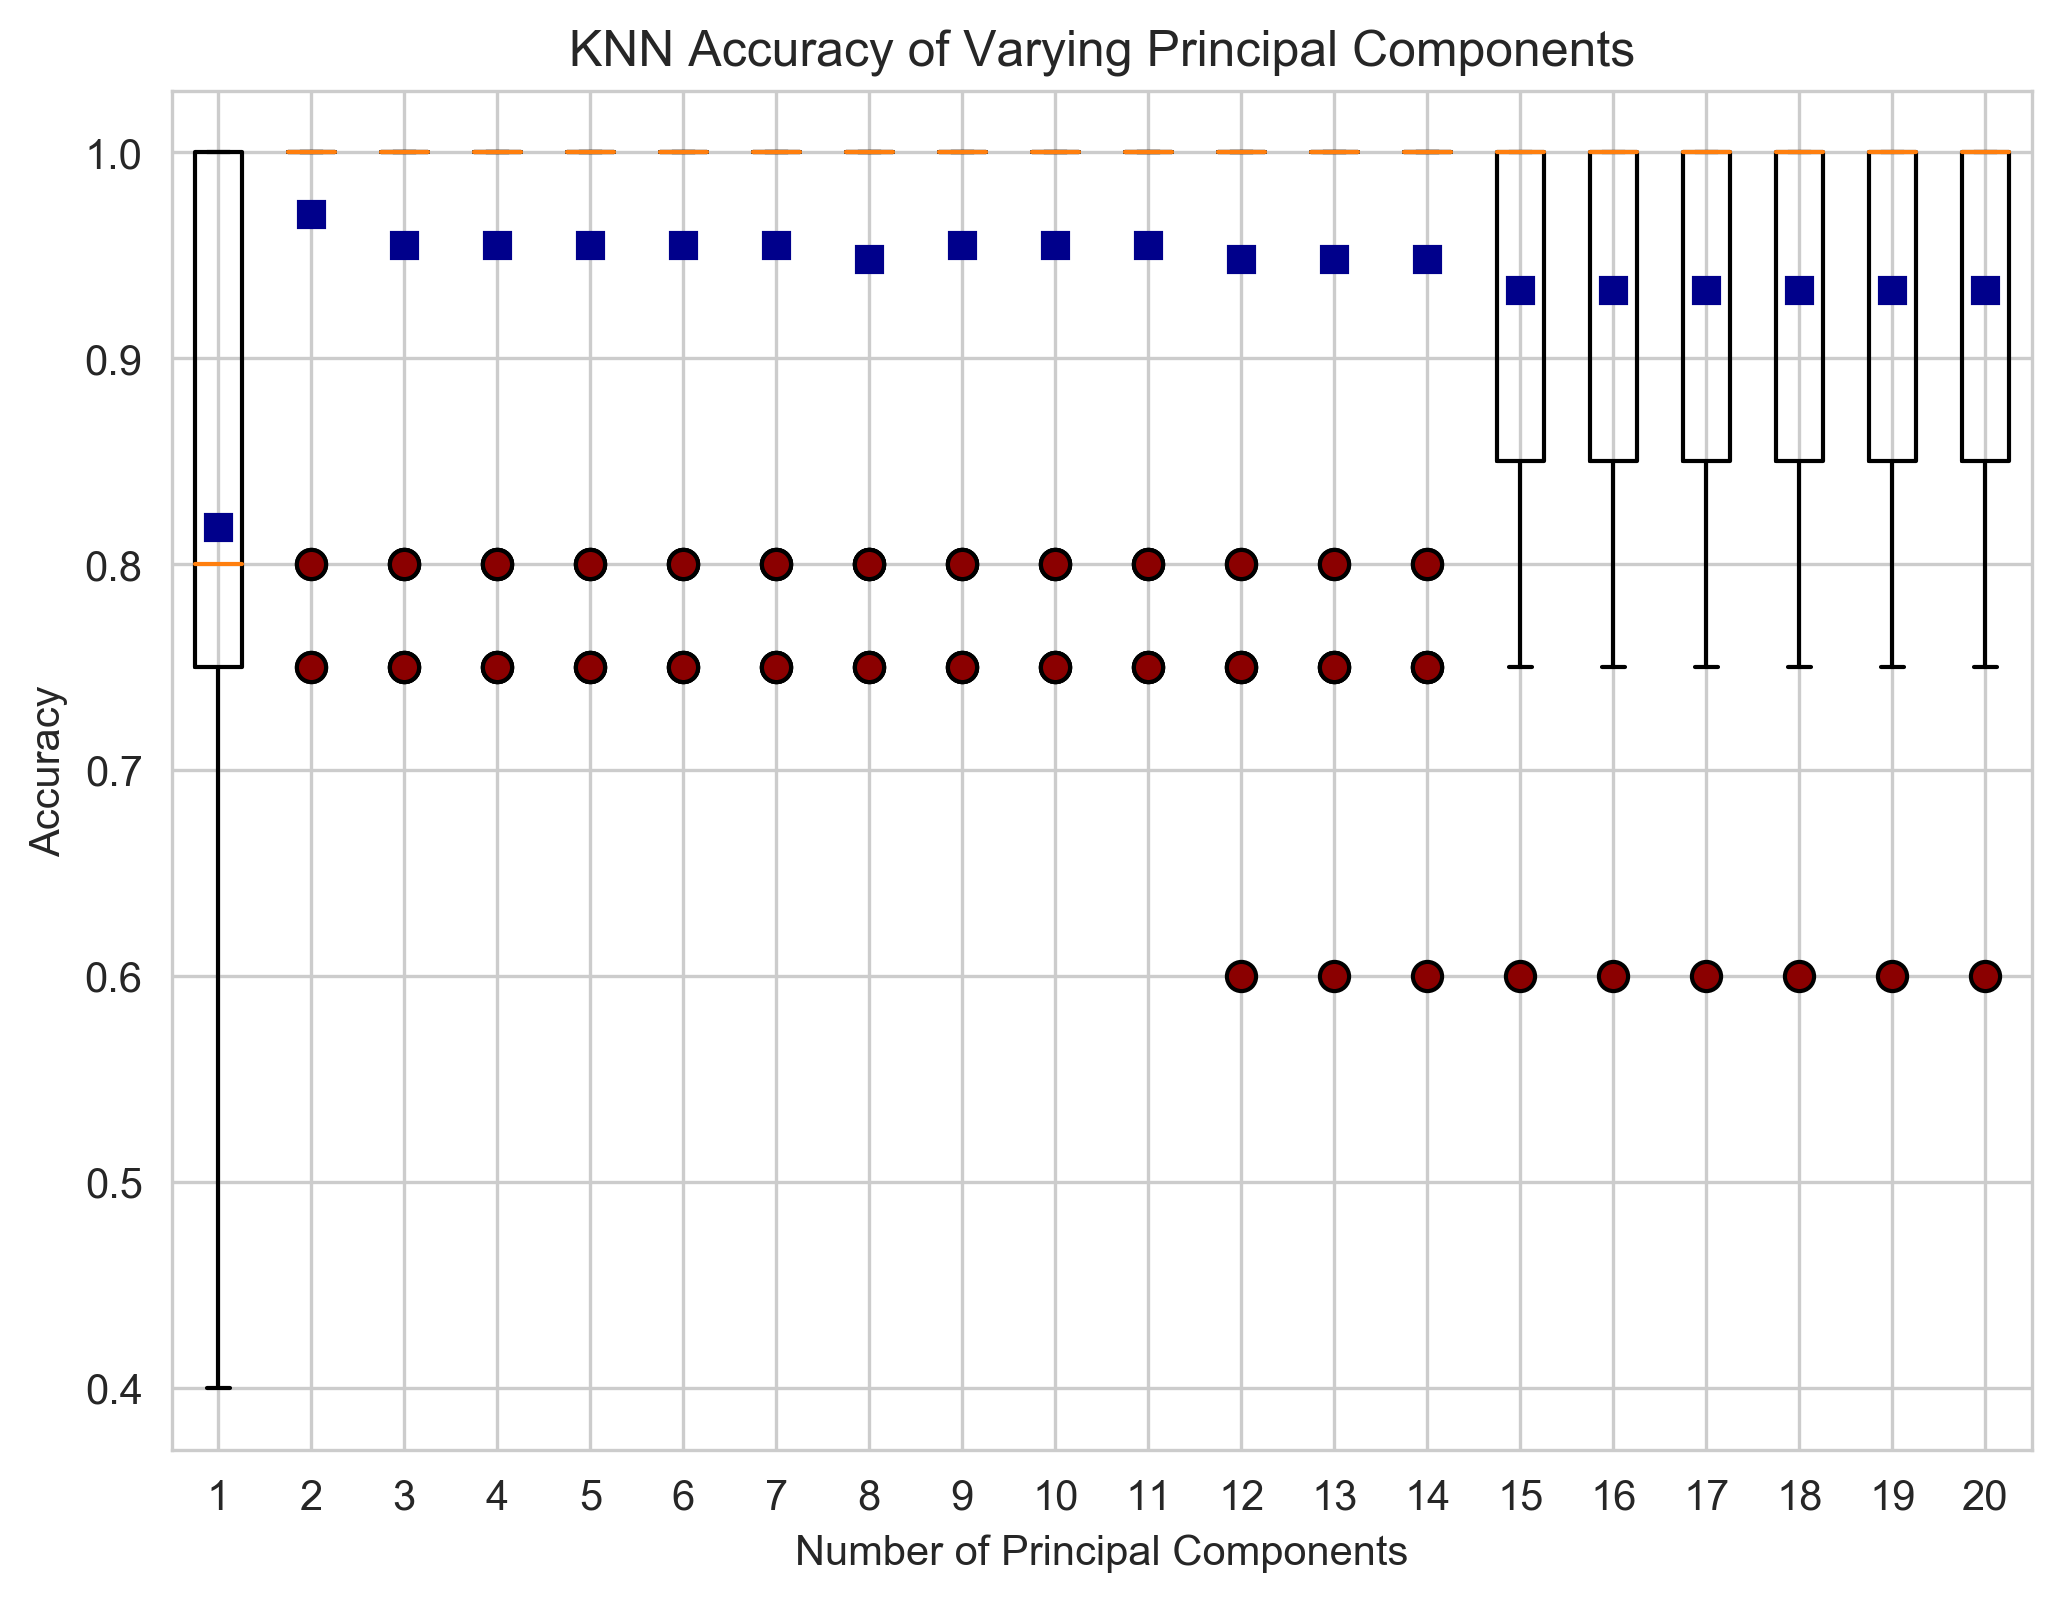

In [9]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', KNeighborsClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('KNN Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

## Gradient Boosting Classifier PCs
Results:
>1 0.818 (0.170)
>2 0.970 (0.077)
>3 0.955 (0.091)
>4 0.955 (0.091)
>5 0.955 (0.091)
>6 0.955 (0.091)
>7 0.955 (0.091)
>8 0.948 (0.094)
>9 0.955 (0.091)
>10 0.955 (0.091)
>11 0.955 (0.091)
>12 0.948 (0.108)
>13 0.948 (0.108)
>14 0.948 (0.108)
>15 0.933 (0.115)
>16 0.933 (0.115)
>17 0.933 (0.115)
>18 0.933 (0.115)
>19 0.933 (0.115)
>20 0.933 (0.115)

>1 0.777 (0.201)
>2 0.972 (0.073)
>3 0.972 (0.073)
>4 0.955 (0.111)
>5 0.955 (0.111)
>6 0.955 (0.111)
>7 0.955 (0.111)
>8 0.965 (0.079)
>9 0.948 (0.125)
>10 0.925 (0.135)
>11 0.933 (0.132)
>12 0.933 (0.132)
>13 0.917 (0.152)
>14 0.917 (0.152)
>15 0.917 (0.152)
>16 0.917 (0.152)
>17 0.917 (0.152)
>18 0.917 (0.152)
>19 0.917 (0.152)
>20 0.925 (0.135)


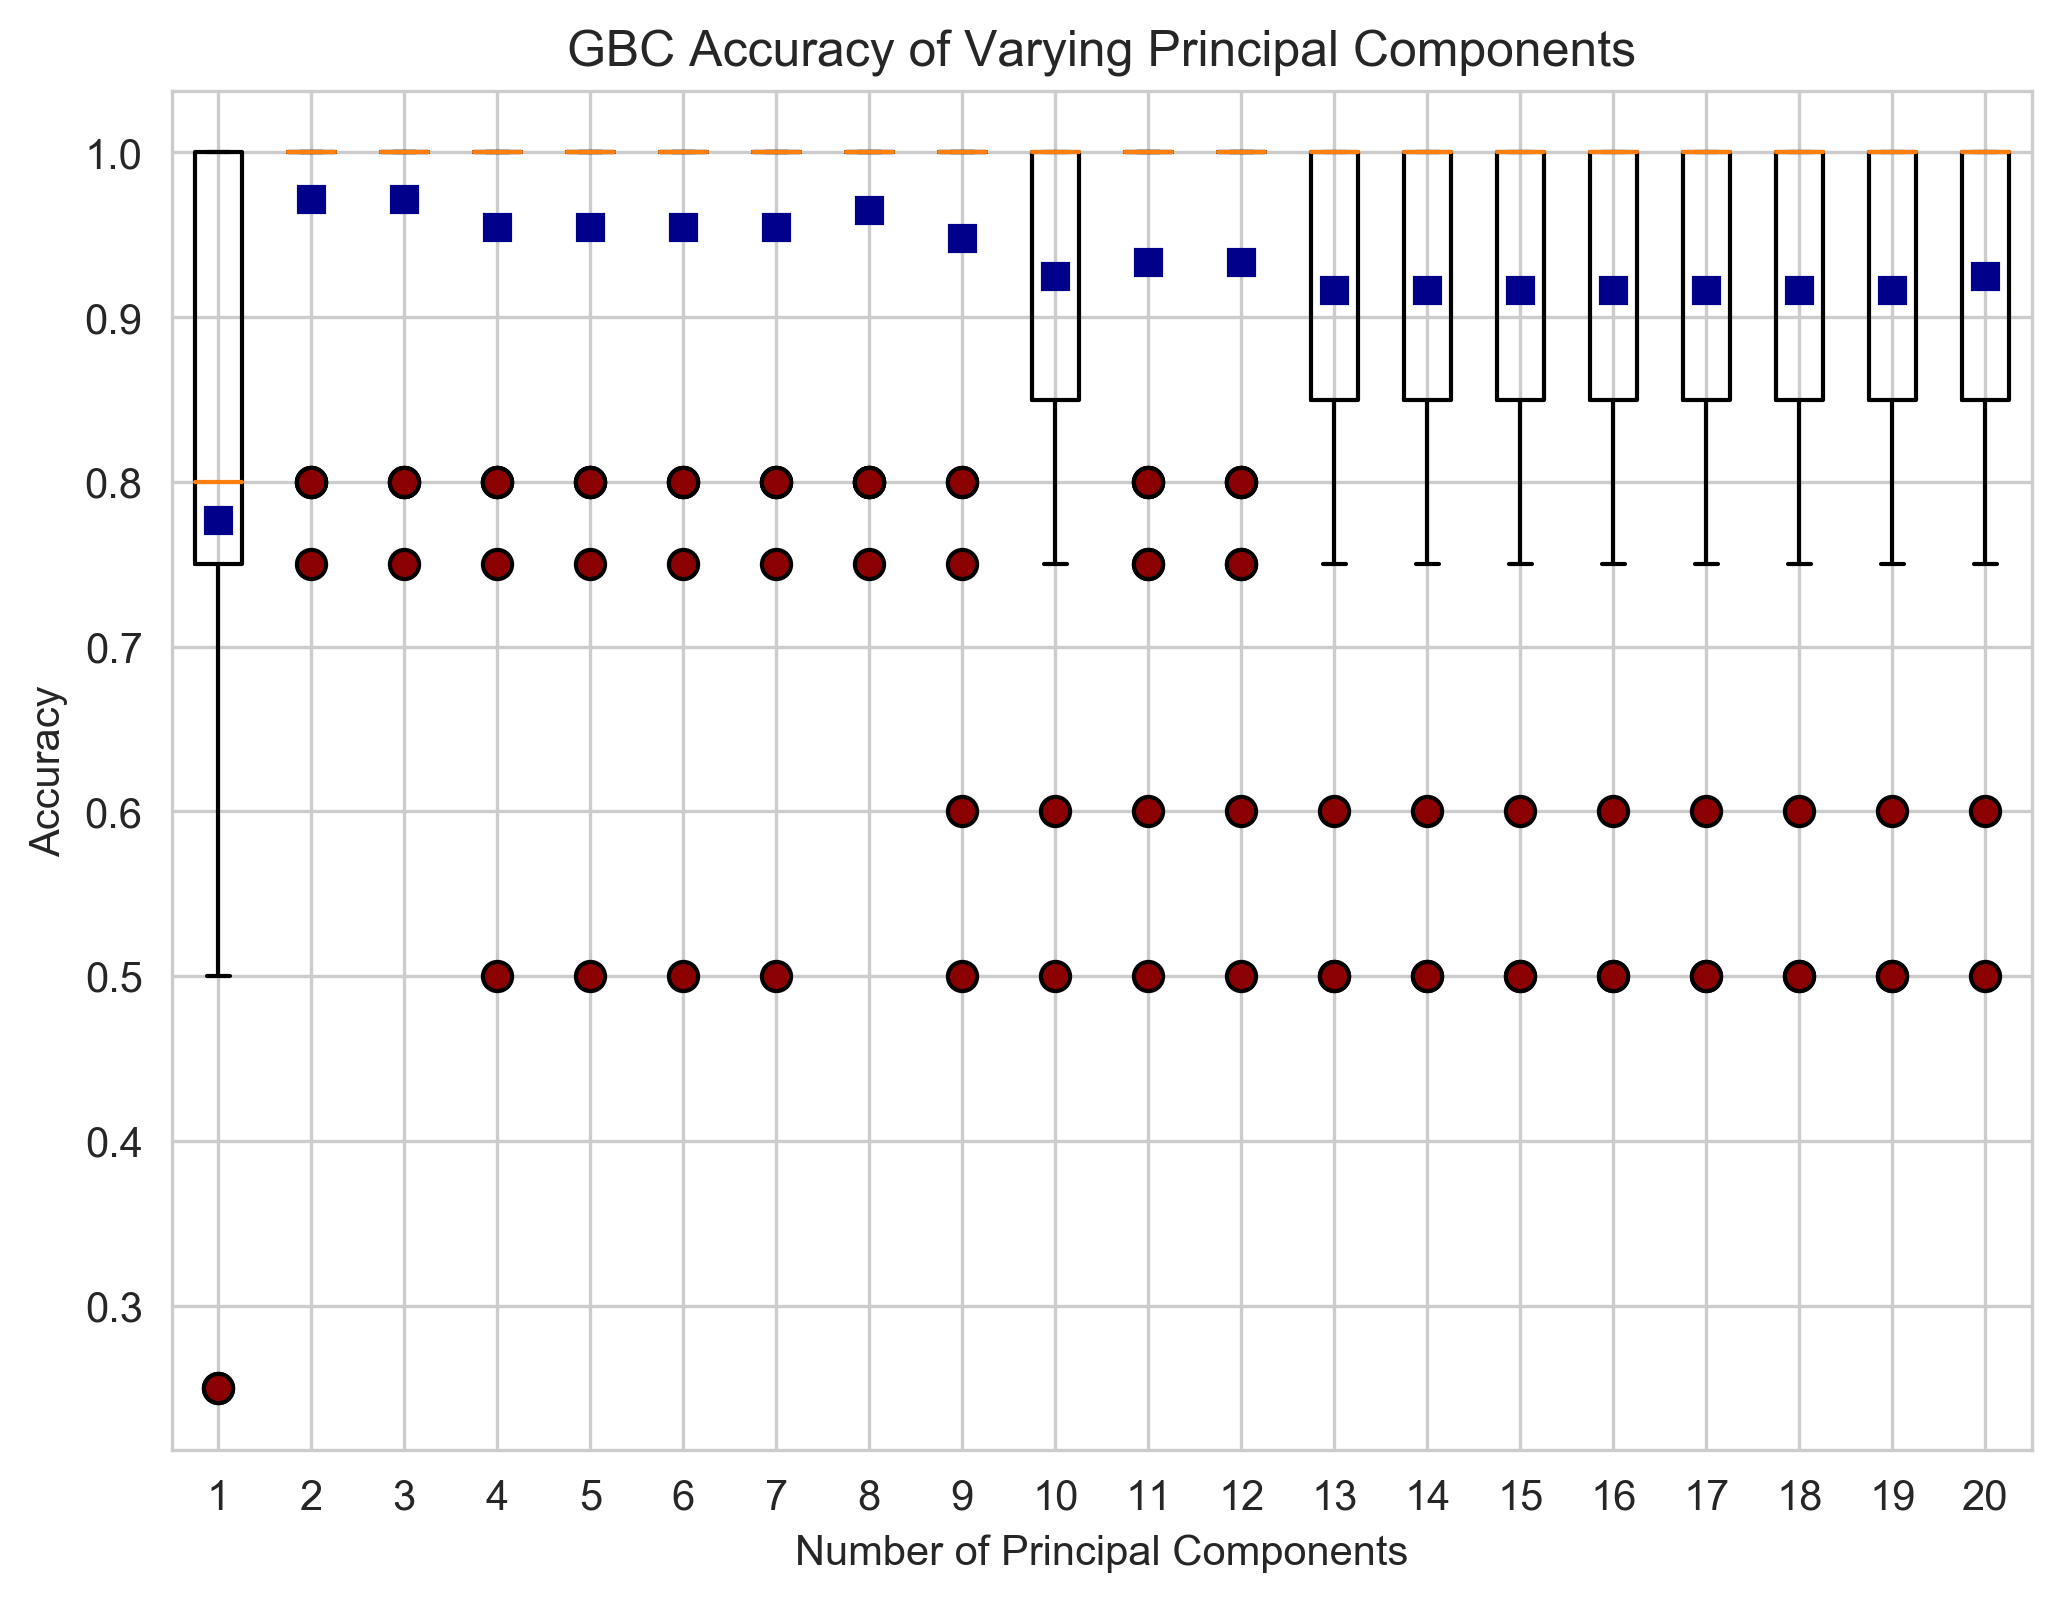

In [3]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', GradientBoostingClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('GBC Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

## Logistic Regression PCs
Results:
>1 0.807 (0.178)
>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 0.977 (0.070)
>6 0.977 (0.070)
>7 0.977 (0.070)
>8 0.977 (0.070)
>9 0.977 (0.070)
>10 0.977 (0.070)
>11 0.977 (0.070)
>12 0.970 (0.077)
>13 0.968 (0.081)
>14 0.977 (0.070)
>15 0.977 (0.070)
>16 0.977 (0.070)
>17 0.977 (0.070)
>18 0.977 (0.070)
>19 0.977 (0.070)
>20 0.977 (0.070)

>1 0.807 (0.178)
>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 0.977 (0.070)
>6 0.977 (0.070)
>7 0.977 (0.070)
>8 0.977 (0.070)
>9 0.977 (0.070)
>10 0.977 (0.070)
>11 0.977 (0.070)
>12 0.970 (0.077)
>13 0.968 (0.081)
>14 0.977 (0.070)
>15 0.977 (0.070)
>16 0.977 (0.070)
>17 0.977 (0.070)
>18 0.977 (0.070)
>19 0.977 (0.070)
>20 0.977 (0.070)


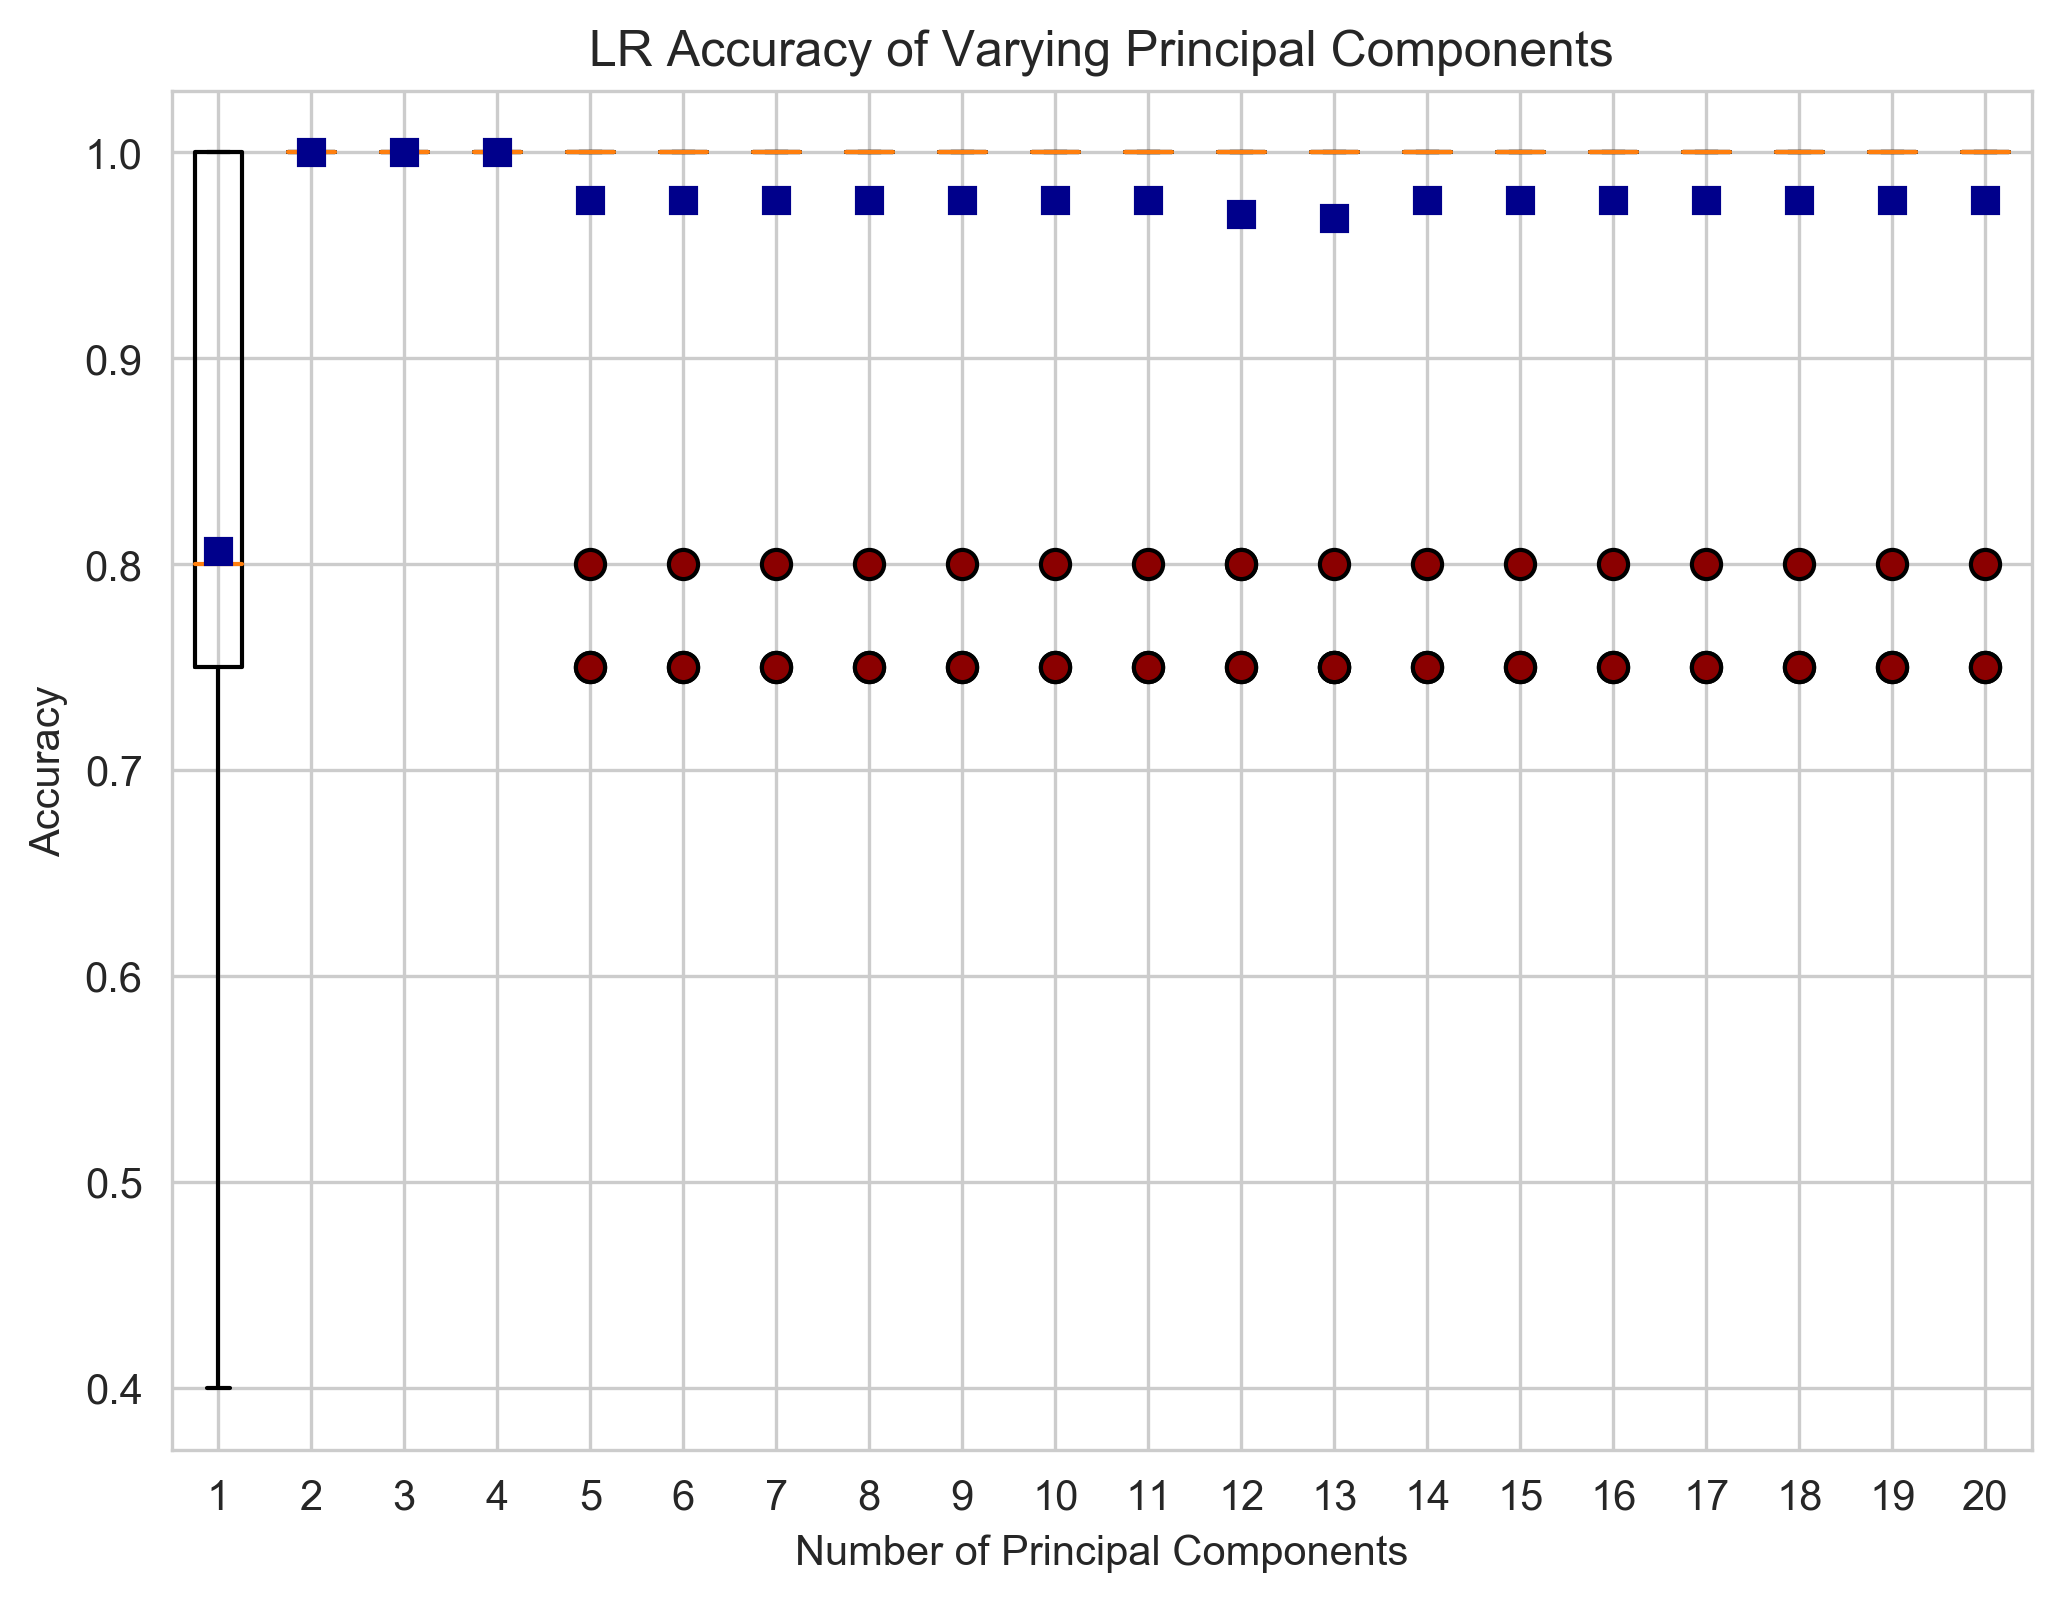

In [11]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('LR Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

##  Gaussian Naive Bayes PCs
Results:
>1 0.835 (0.174)
>2 0.827 (0.172)
>3 0.827 (0.172)
>4 0.827 (0.172)
>5 0.862 (0.162)
>6 0.847 (0.172)
>7 0.858 (0.154)
>8 0.865 (0.147)
>9 0.872 (0.148)
>10 0.892 (0.151)
>11 0.898 (0.151)
>12 0.905 (0.142)
>13 0.942 (0.132)
>14 0.943 (0.130)
>15 0.957 (0.087)
>16 0.957 (0.087)
>17 0.963 (0.083)
>18 0.963 (0.083)
>19 0.957 (0.101)
>20 0.948 (0.108)

>1 0.835 (0.174)
>2 0.827 (0.172)
>3 0.827 (0.172)
>4 0.827 (0.172)
>5 0.862 (0.162)
>6 0.847 (0.172)
>7 0.858 (0.154)
>8 0.865 (0.147)
>9 0.872 (0.148)
>10 0.892 (0.151)
>11 0.898 (0.151)
>12 0.905 (0.142)
>13 0.942 (0.132)
>14 0.943 (0.130)
>15 0.957 (0.087)
>16 0.957 (0.087)
>17 0.963 (0.083)
>18 0.957 (0.101)
>19 0.957 (0.101)
>20 0.948 (0.108)


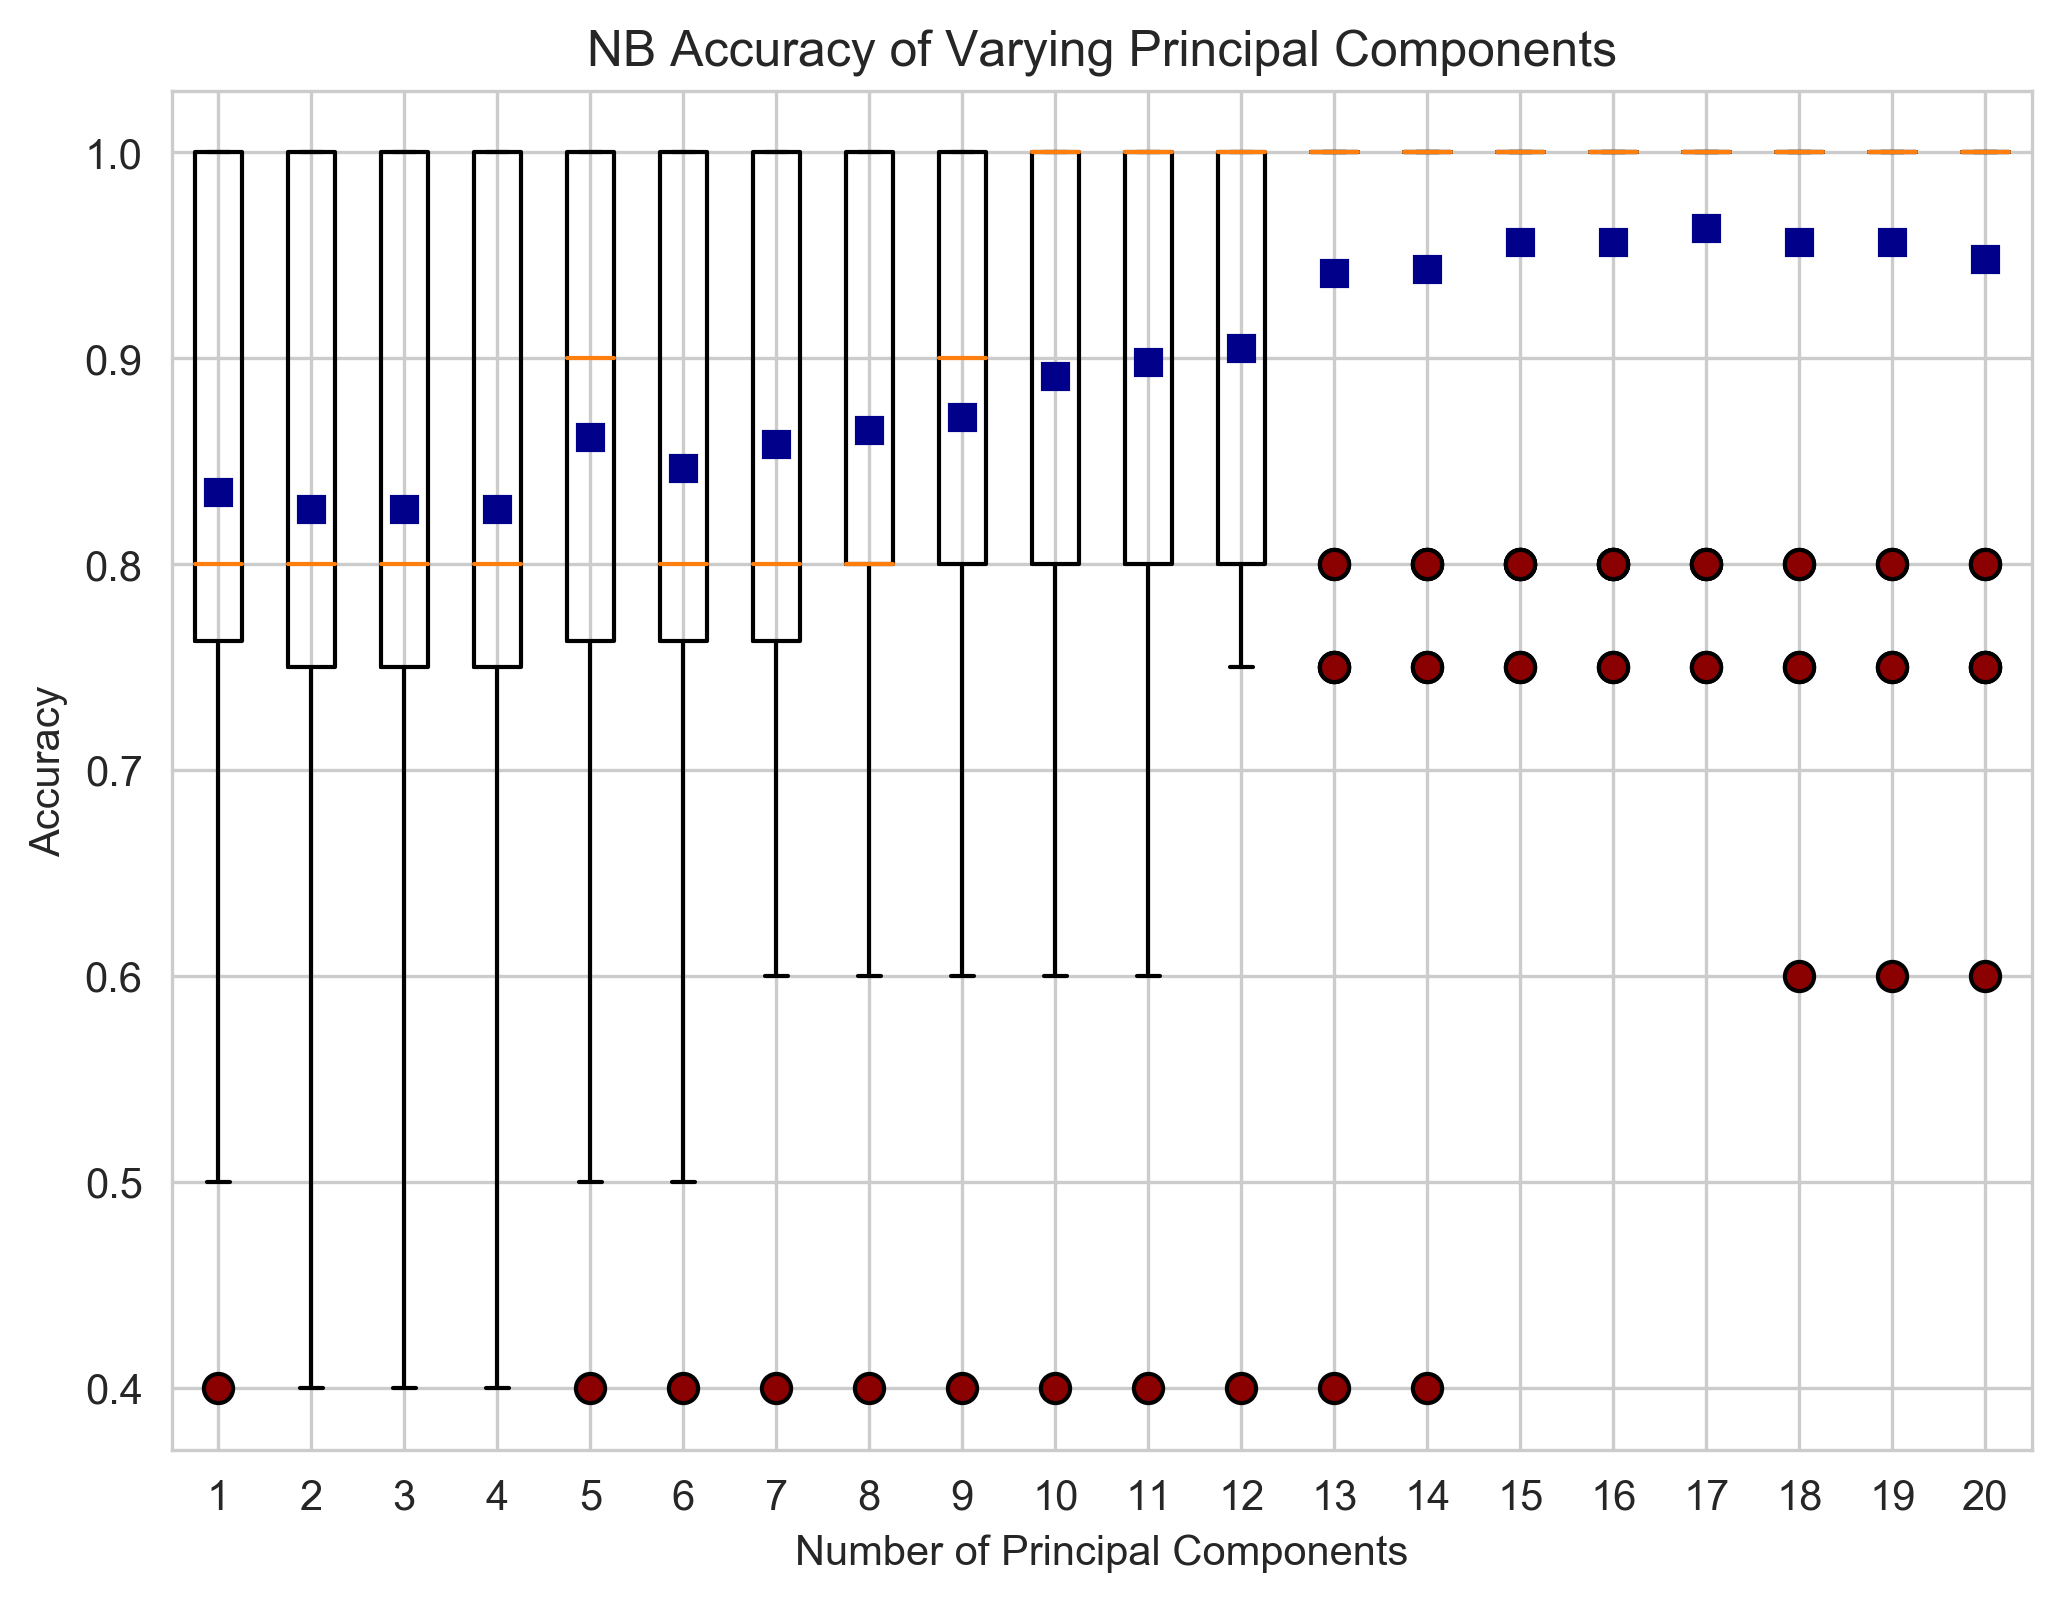

In [12]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('NB Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

## Random Forest PCs
>1 0.777 (0.201)
>2 0.985 (0.056)
>3 0.960 (0.090)
>4 0.963 (0.083)
>5 0.977 (0.070)
>6 0.962 (0.086)
>7 0.970 (0.077)
>8 0.960 (0.090)
>9 0.968 (0.081)
>10 0.963 (0.097)
>11 0.945 (0.100)
>12 0.933 (0.115)
>13 0.937 (0.124)
>14 0.933 (0.115)
>15 0.925 (0.119)
>16 0.938 (0.115)
>17 0.933 (0.132)
>18 0.925 (0.119)
>19 0.917 (0.138)
>20 0.917 (0.138)

>1 0.777 (0.201)
>2 0.985 (0.056)
>3 0.960 (0.090)
>4 0.963 (0.083)
>5 0.977 (0.070)
>6 0.962 (0.086)
>7 0.970 (0.077)
>8 0.960 (0.090)
>9 0.968 (0.081)
>10 0.963 (0.097)
>11 0.945 (0.100)
>12 0.933 (0.115)
>13 0.937 (0.124)
>14 0.933 (0.115)
>15 0.925 (0.119)
>16 0.938 (0.115)
>17 0.933 (0.132)
>18 0.925 (0.119)
>19 0.917 (0.138)
>20 0.917 (0.138)


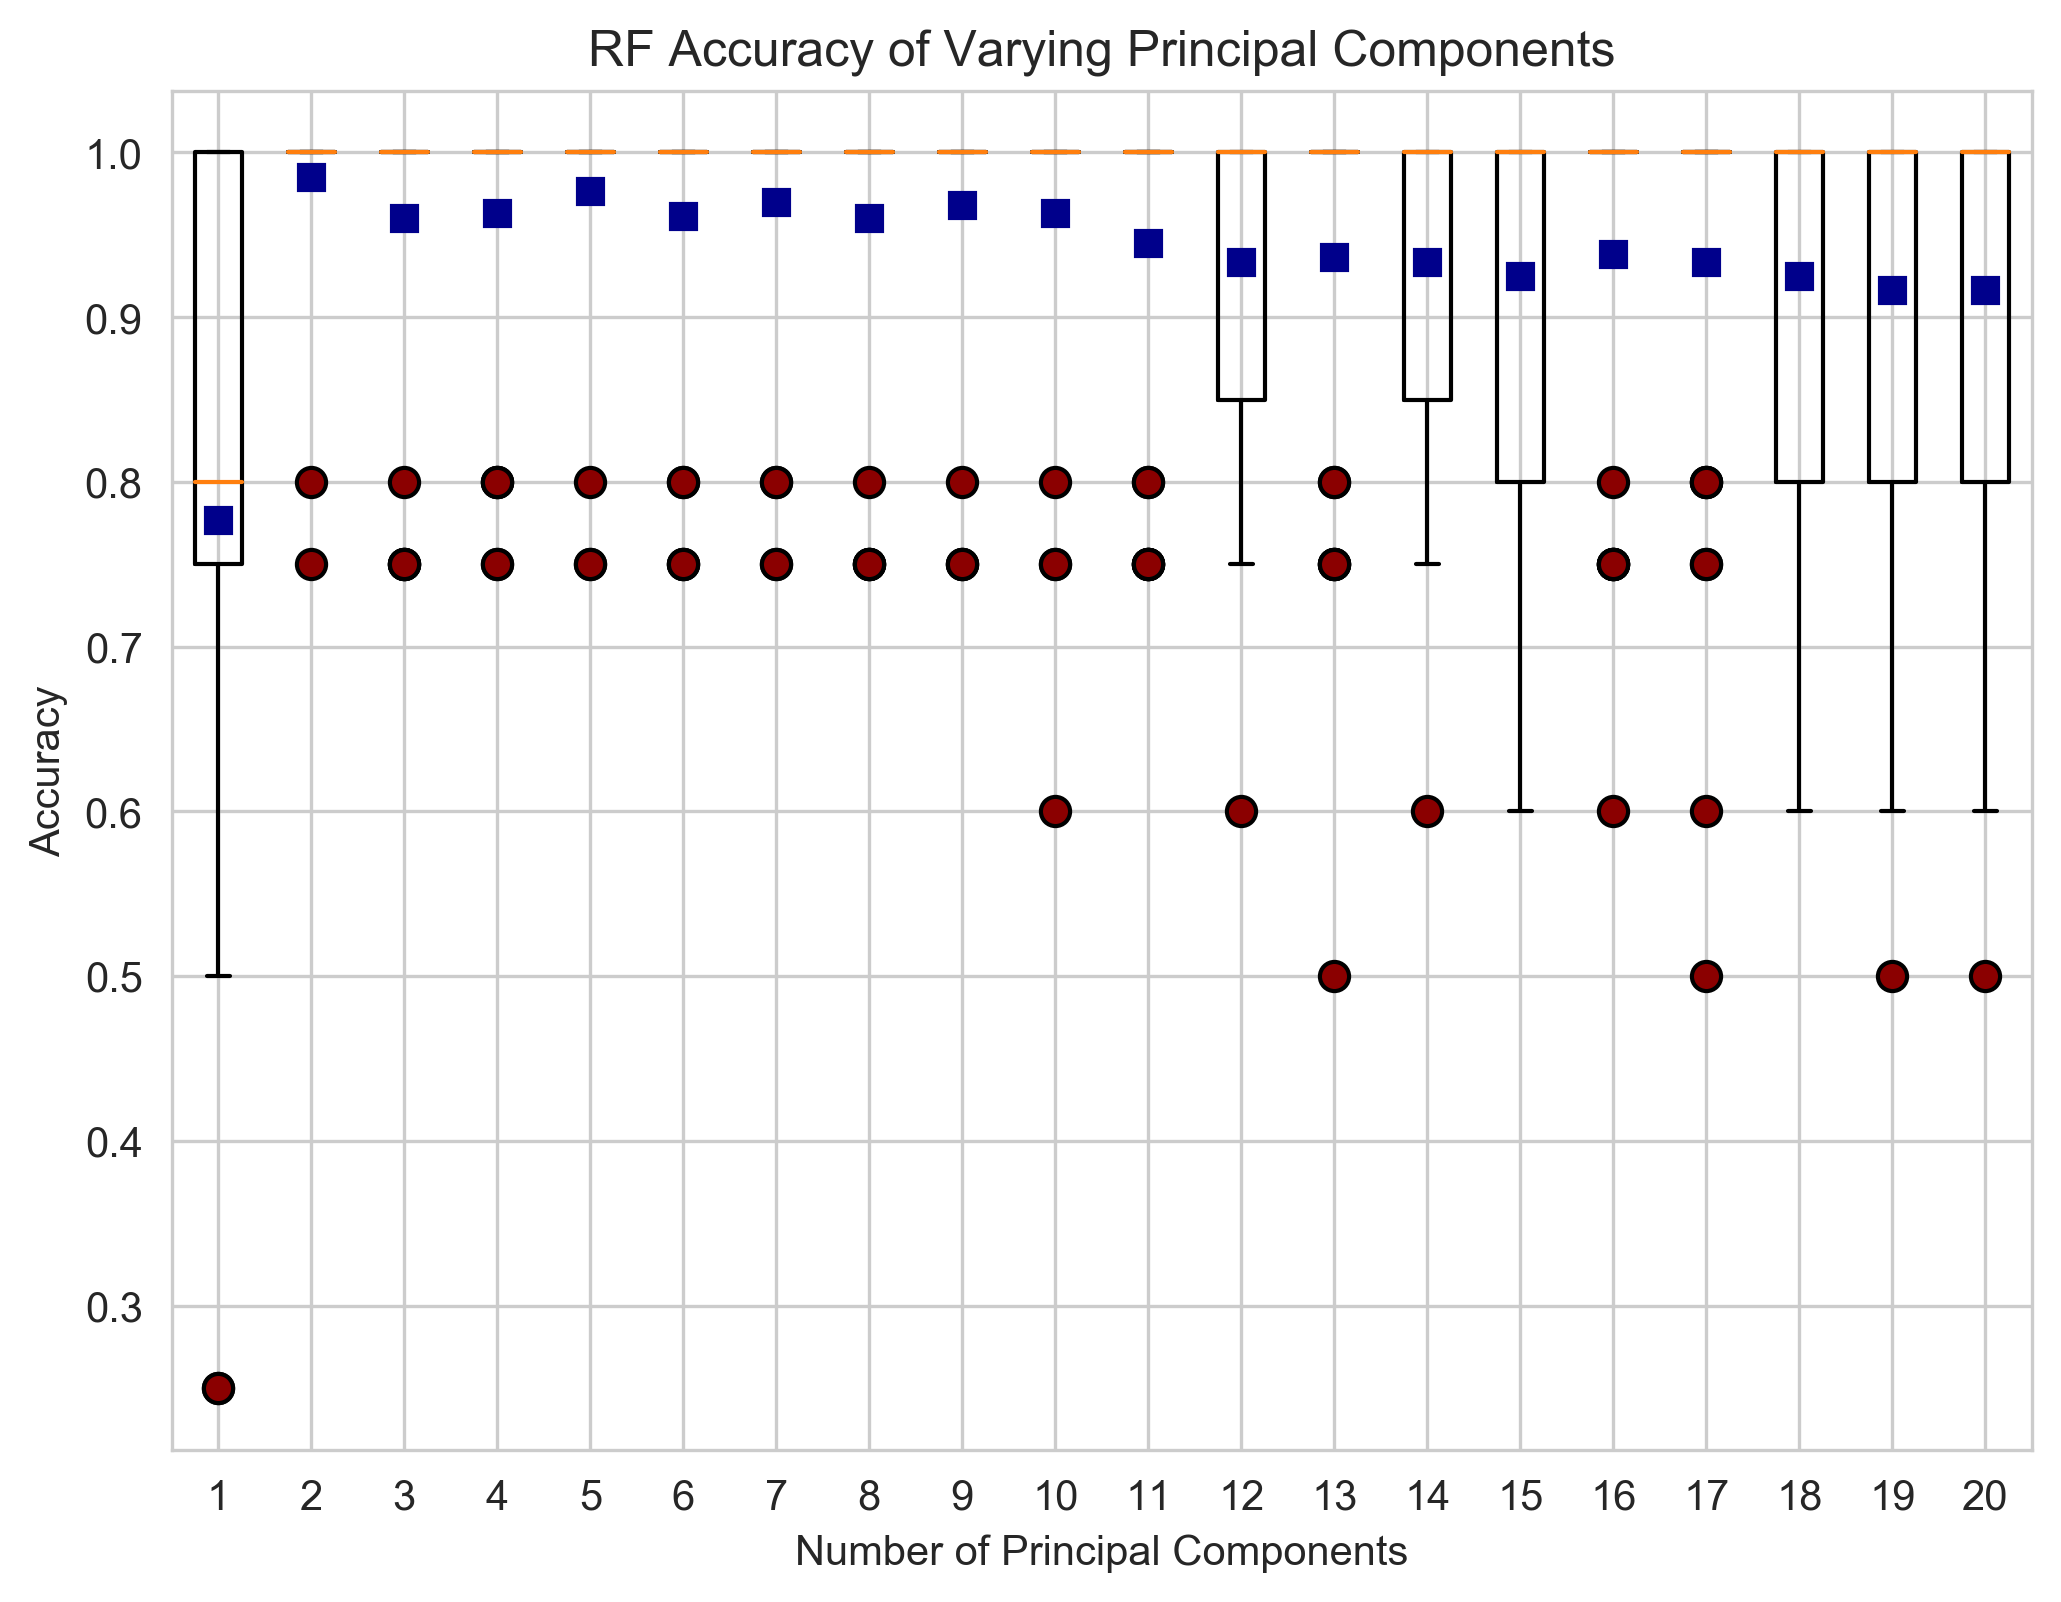

In [13]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', RandomForestClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('RF Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()

## Support Vector Machine PCs
>1 0.792 (0.166)
>2 0.948 (0.108)
>3 0.948 (0.108)
>4 0.948 (0.108)
>5 0.940 (0.113)
>6 0.940 (0.113)
>7 0.940 (0.113)
>8 0.948 (0.108)
>9 0.948 (0.108)
>10 0.948 (0.108)
>11 0.948 (0.108)
>12 0.948 (0.108)
>13 0.948 (0.108)
>14 0.948 (0.108)
>15 0.940 (0.113)
>16 0.940 (0.113)
>17 0.940 (0.113)
>18 0.940 (0.113)
>19 0.940 (0.113)
>20 0.940 (0.113)

>1 0.792 (0.166)
>2 0.948 (0.108)
>3 0.948 (0.108)
>4 0.948 (0.108)
>5 0.940 (0.113)
>6 0.940 (0.113)
>7 0.940 (0.113)
>8 0.948 (0.108)
>9 0.948 (0.108)
>10 0.948 (0.108)
>11 0.948 (0.108)
>12 0.948 (0.108)
>13 0.948 (0.108)
>14 0.948 (0.108)
>15 0.940 (0.113)
>16 0.940 (0.113)
>17 0.940 (0.113)
>18 0.940 (0.113)
>19 0.940 (0.113)
>20 0.940 (0.113)


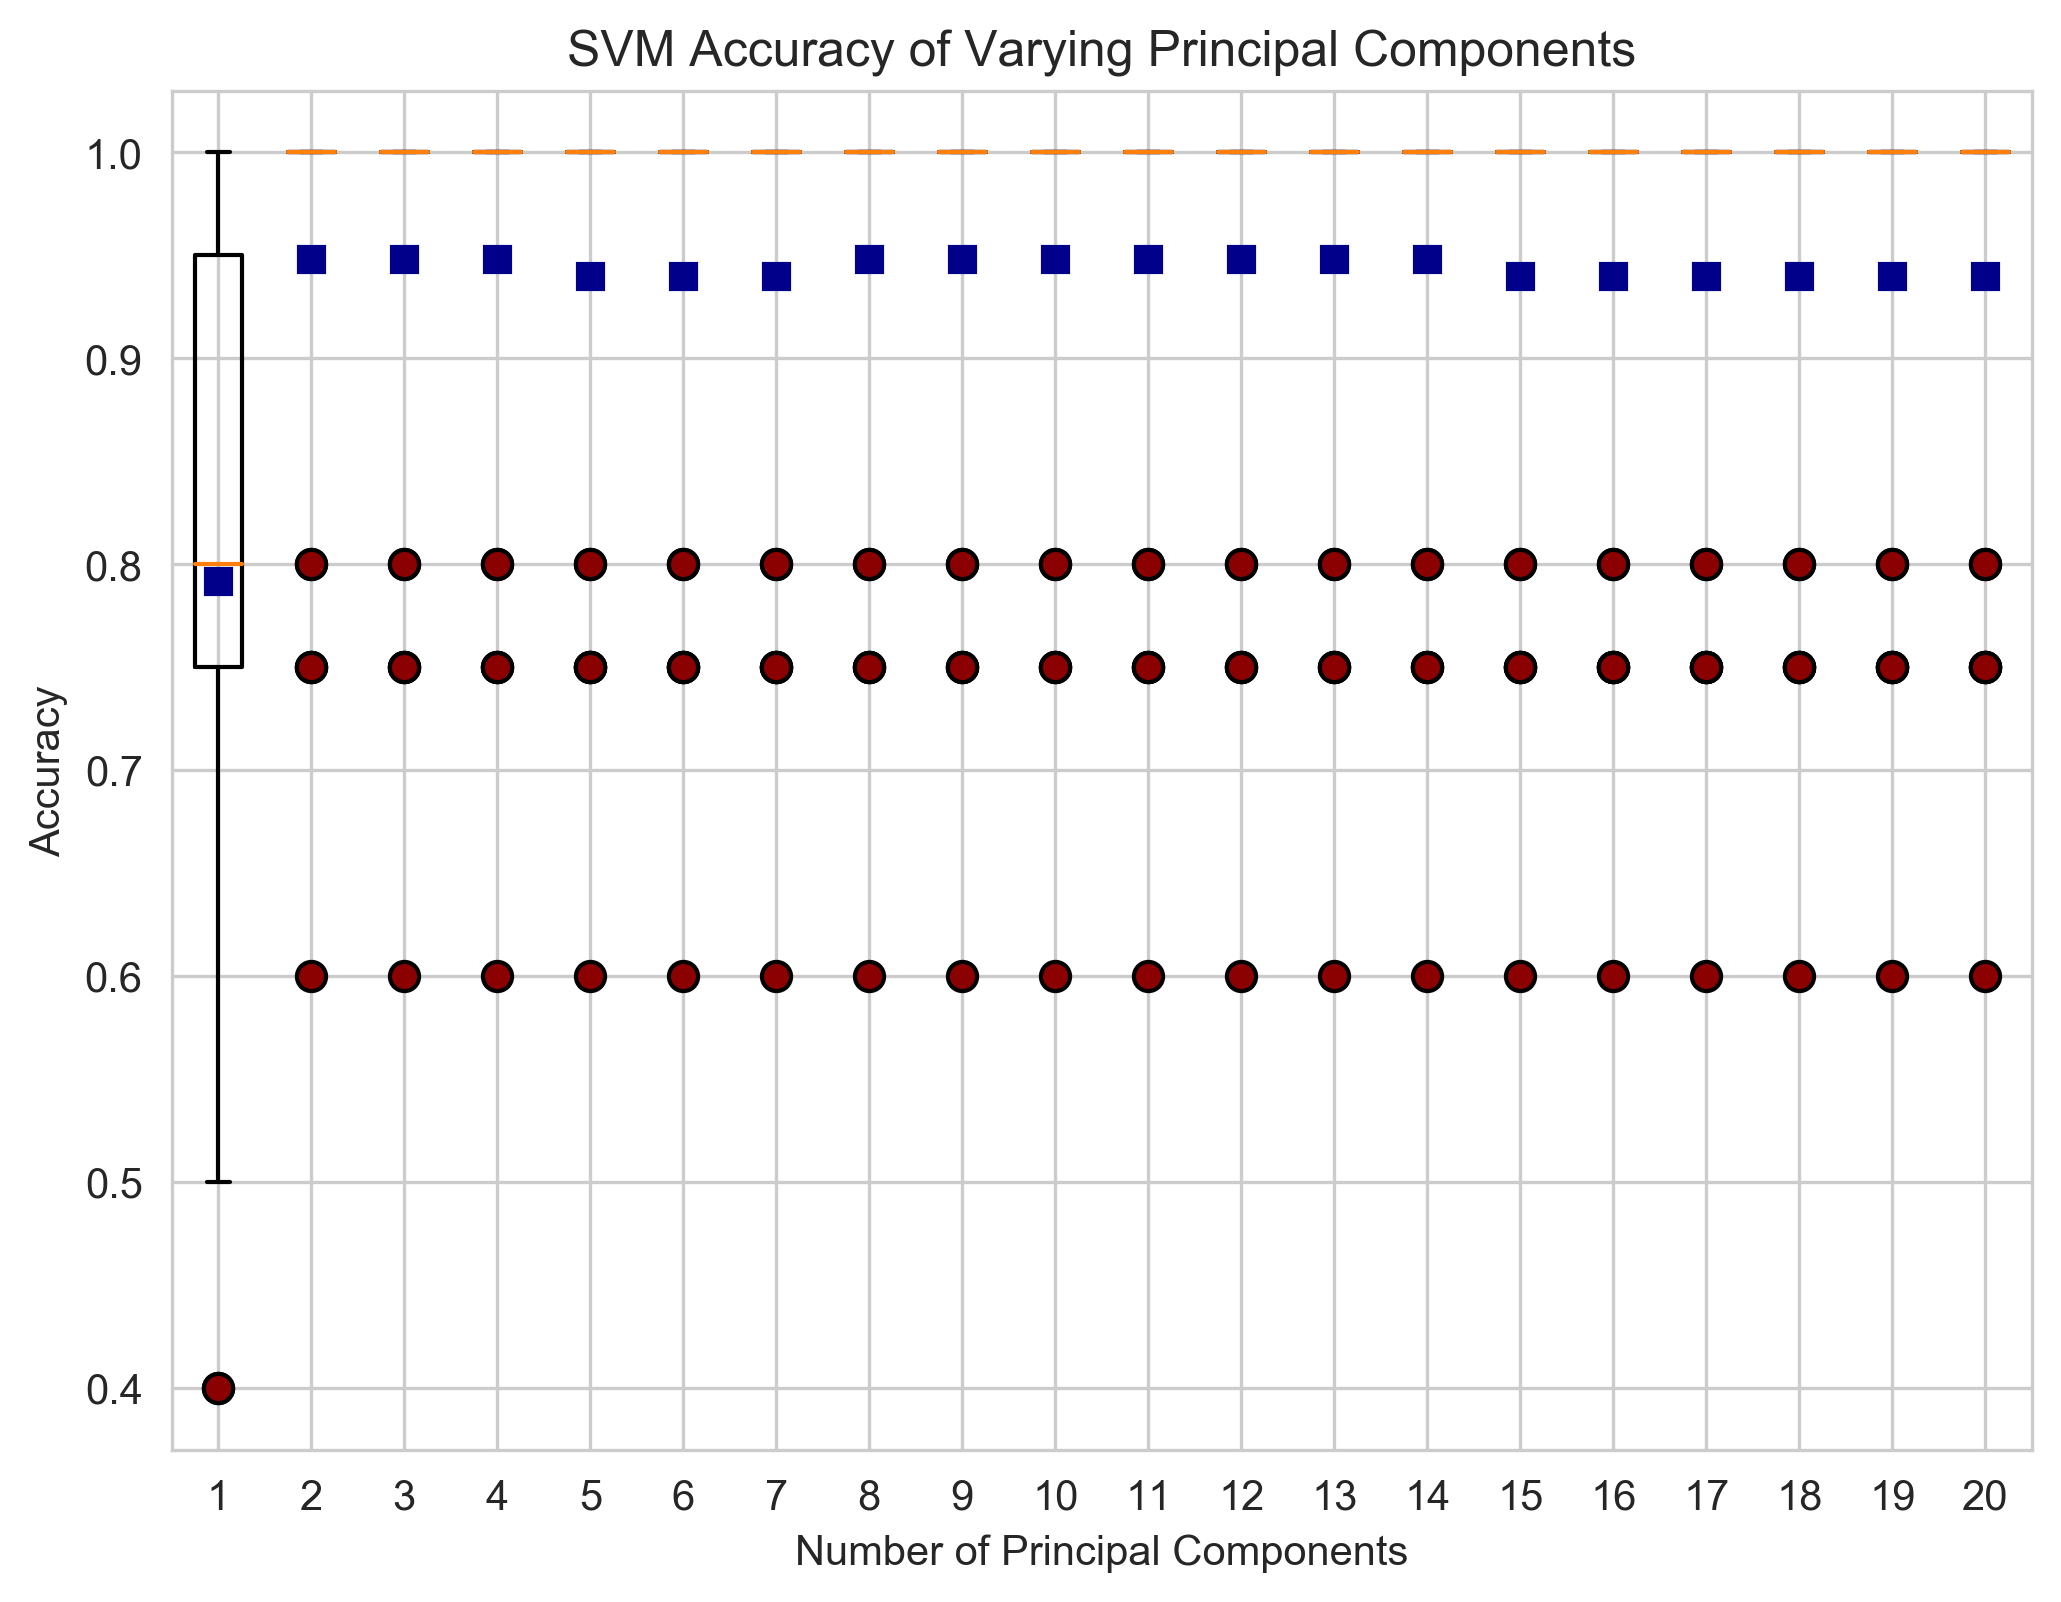

In [14]:
# Load the dataset
def load_dataset():
    X = df.drop(101300, axis=1) 
    y = df[101300].astype('int') # Last column is the modified or not modified feature
    return X, y
 
# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', SVC())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# Define dataset
X, y = load_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.figure(figsize=(8, 6), dpi=300)
sns.set_style('whitegrid')
pyplot.title('SVM Accuracy of Varying Principal Components')
pyplot.boxplot(results, labels=names, showmeans=True, meanprops={"marker":"s","markerfacecolor":"darkblue", "markeredgecolor":"darkblue"}, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'darkred'})
pyplot.xlabel('Number of Principal Components')
pyplot.ylabel('Accuracy')
pyplot.show()